In [1]:
# ADP 22회 ML - 피마 인디언 당뇨병 분류 

In [2]:
## 1. EDA

In [3]:
import pandas as pd

In [42]:
ddf = pd.read_csv('data/adp22-p1.csv')

In [43]:
ddf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 767 entries, 0 to 766
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   6       767 non-null    int64  
 1   148     767 non-null    int64  
 2   72      767 non-null    int64  
 3   35      767 non-null    int64  
 4   0       767 non-null    int64  
 5   33.6    767 non-null    float64
 6   0.627   767 non-null    float64
 7   50      767 non-null    int64  
 8   1       767 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [44]:
# 컬럼명 추가
column_name = ['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age','Outcome']

In [45]:
df = pd.DataFrame(ddf.values.tolist(), columns=column_name)

In [46]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,1.0,85.0,66.0,29.0,0.0,26.6,0.351,31.0,0.0
1,8.0,183.0,64.0,0.0,0.0,23.3,0.672,32.0,1.0
2,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21.0,0.0
3,0.0,137.0,40.0,35.0,168.0,43.1,2.288,33.0,1.0
4,5.0,116.0,74.0,0.0,0.0,25.6,0.201,30.0,0.0


In [32]:
display(df.isnull().sum())  # 결측치 없음

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [33]:
df.describe()   # 이상치 99999 발견

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,767.000000,767.000000,767.000000,767.000000,767.000000,767.000000,767.000000,767.000000,767.000000
mean,3.842243,381.338983,199.374185,150.894394,210.280313,292.653585,0.471674,1075.936115,0.348110
std,3.370877,5096.974491,3608.311971,3610.047978,3609.705910,5101.417850,0.331497,10162.609806,0.476682
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243500,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,36.000000,32.000000,0.371000,29.000000,0.000000
75%,6.000000,141.000000,80.000000,32.000000,128.500000,36.600000,0.625000,41.000000,1.000000
max,17.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,2.420000,99999.000000,1.000000


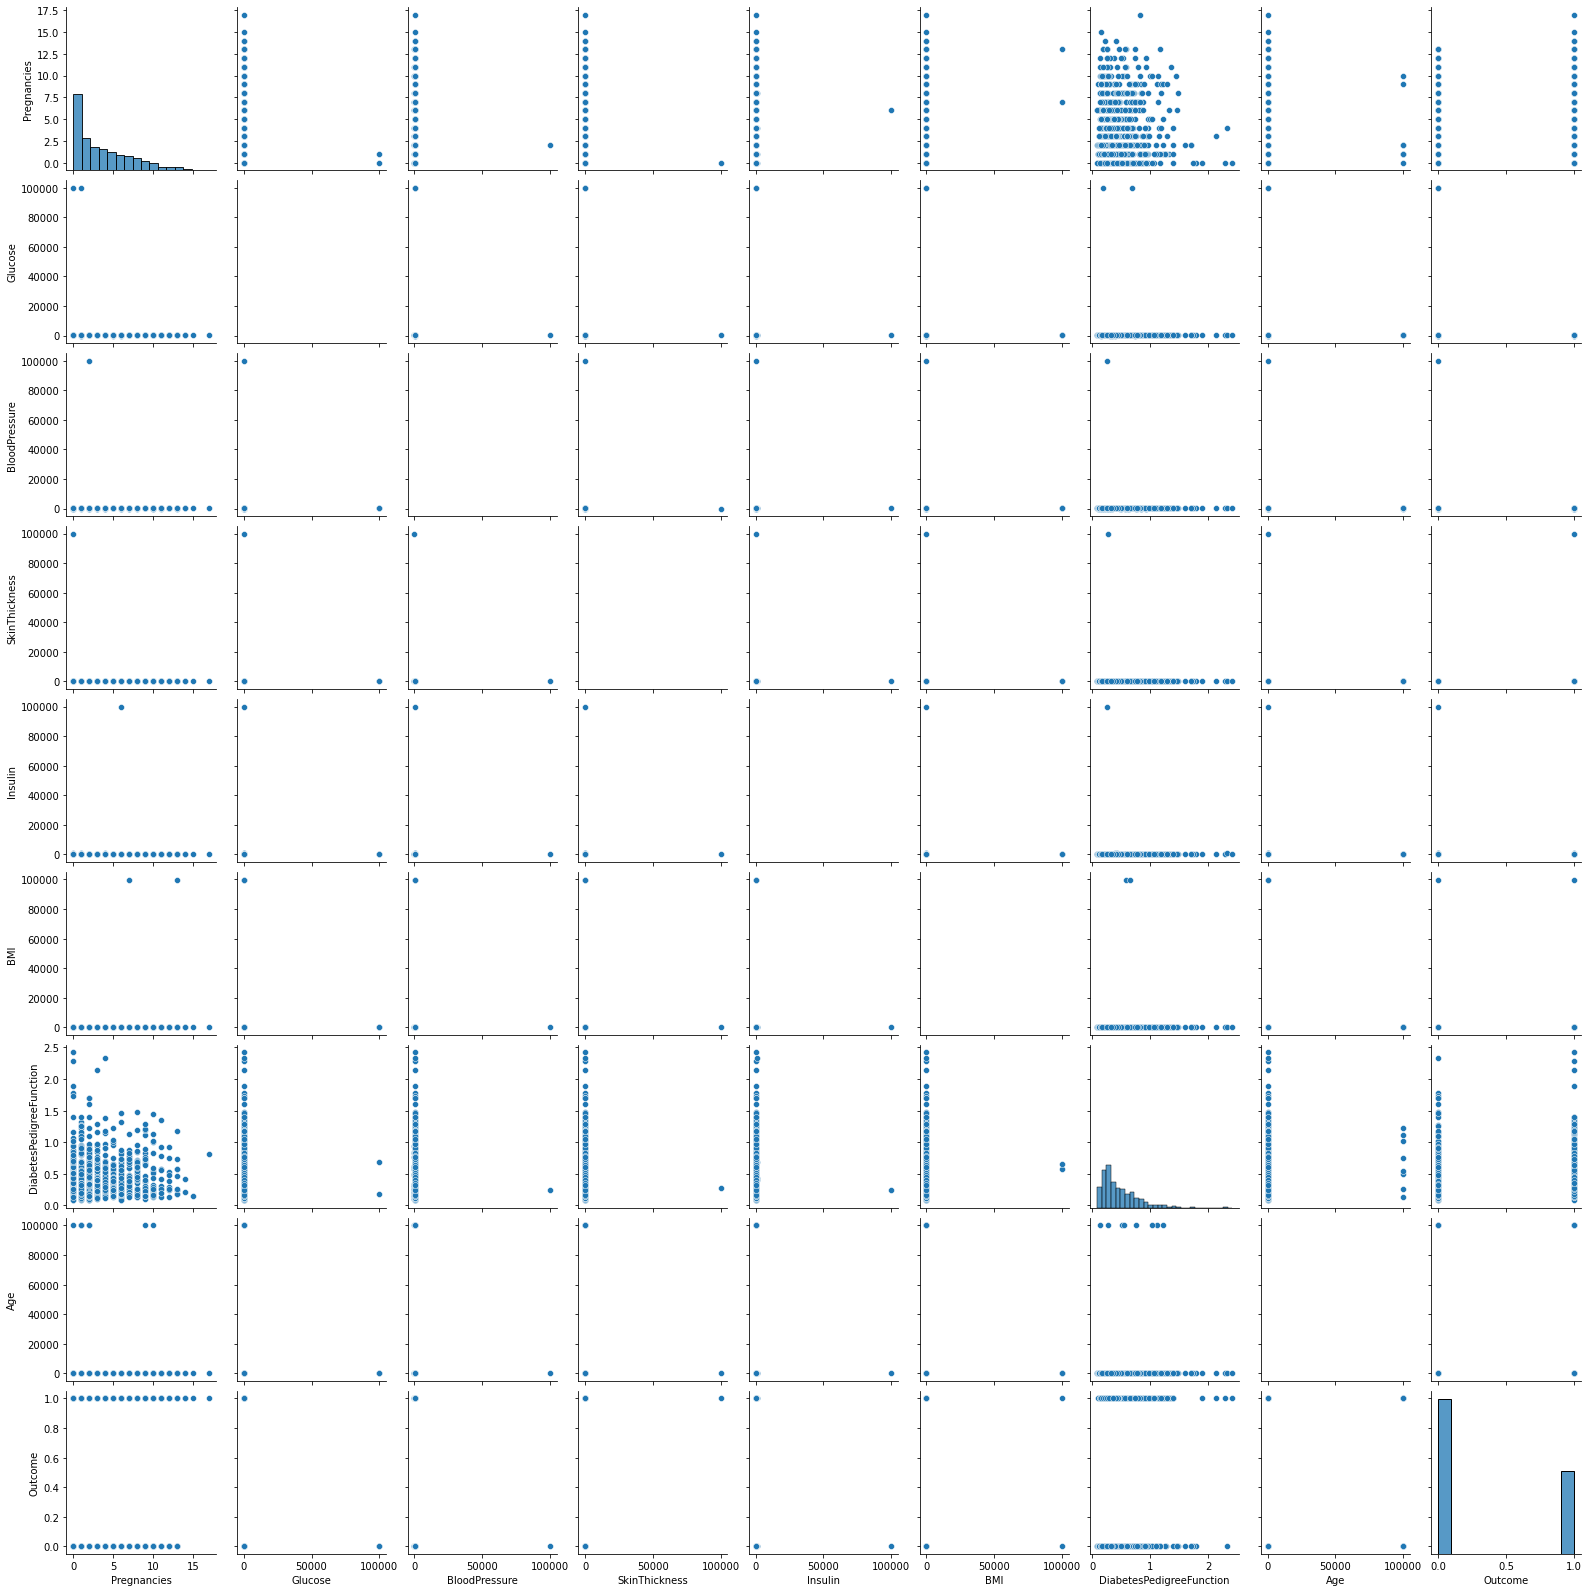

In [34]:
# 시각화
## pairplot() 시간 오래 걸림
import seaborn as sns
import matplotlib.pyplot as plt
sns.pairplot(df)

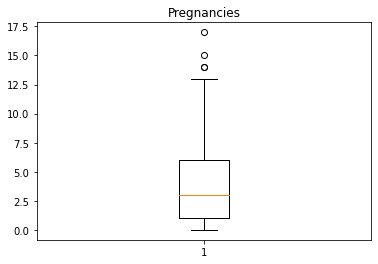

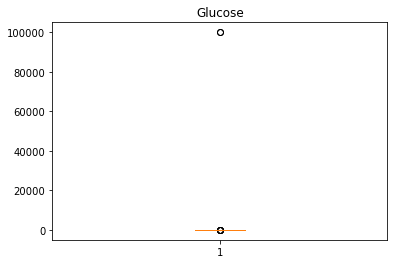

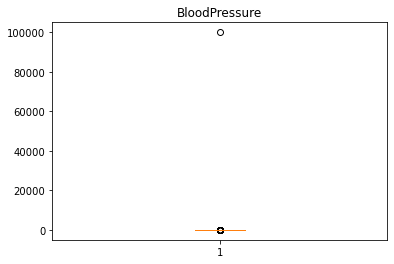

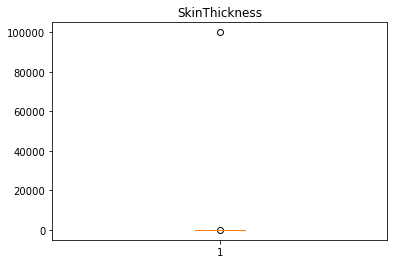

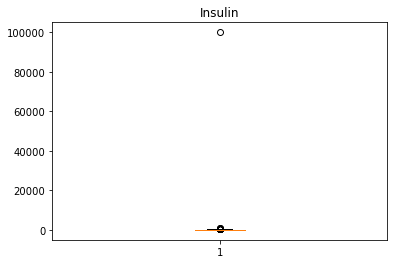

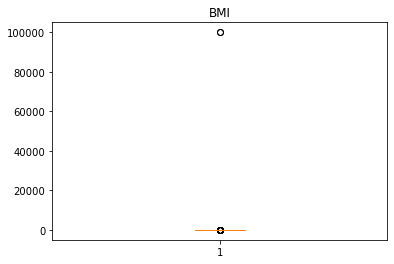

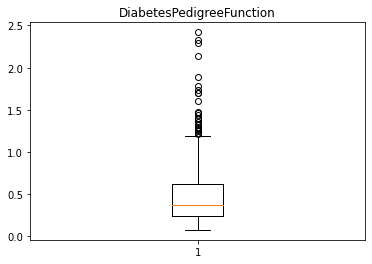

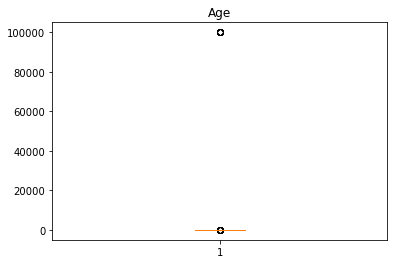

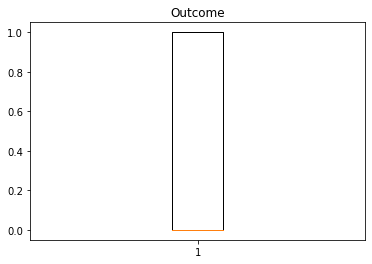

In [35]:
for v in df.select_dtypes(include='float'):
    target = df[v]
    plt.boxplot(target)
    plt.title(v)
    plt.show()

In [47]:
print(df[df.Glucose == 99999]) 
# -> 99999가 들어가있는 index만 출력하는 코드 for 구문으로 작성하는 법 확인

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
17           1.0  99999.0           30.0           38.0     83.0  43.3   
530          0.0  99999.0           76.0            0.0      0.0  45.3   

     DiabetesPedigreeFunction   Age  Outcome  
17                      0.183  33.0      0.0  
530                     0.686  24.0      0.0  


In [37]:
# 이상치 99999 를 0으로 대체  
#  -> 삭제하는게 나은가? 각 컬럼별 이상치 개수 확인하는 코드 확인
## + 이상치 있는 index를 삭제하는 코드 확인
df.loc[df.Glucose == 99999, 'Glucose'] = 0
df.loc[df.BloodPressure == 99999, 'BloodPressure'] = 0
df.loc[df.SkinThickness == 99999, 'SkinThickness'] = 0
df.loc[df.Insulin == 99999, 'Insulin'] = 0
df.loc[df.BMI == 99999, 'BMI'] = 0
df.loc[df.Age == 99999, 'Age'] = 0

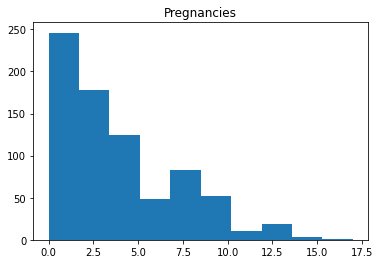

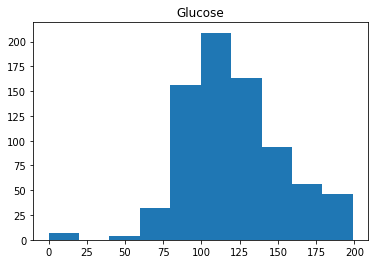

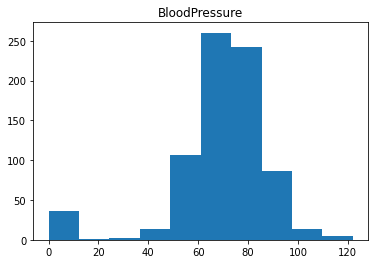

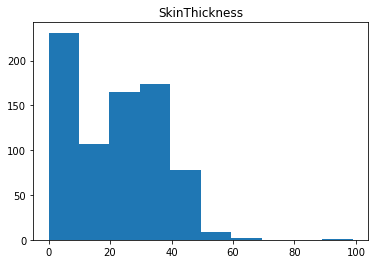

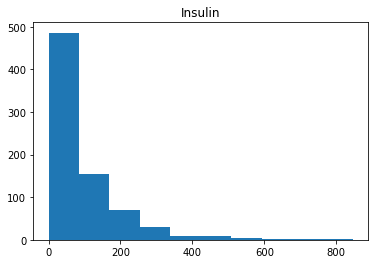

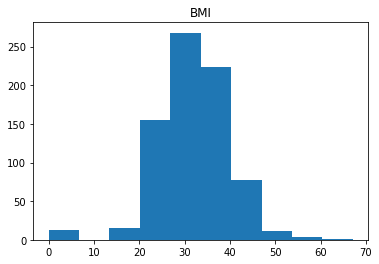

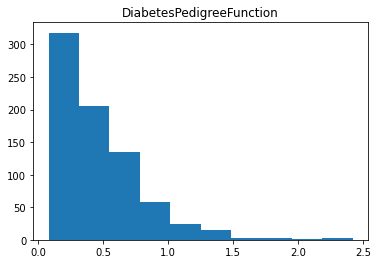

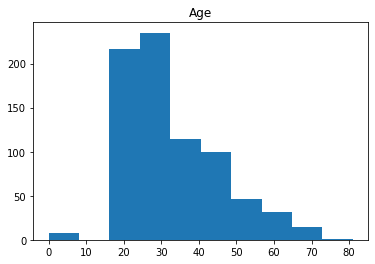

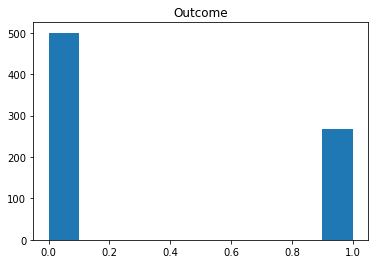

In [38]:
for v in df.select_dtypes(include='float'):
    target = df[v]
    plt.hist(target)
    plt.title(v)
    plt.show()

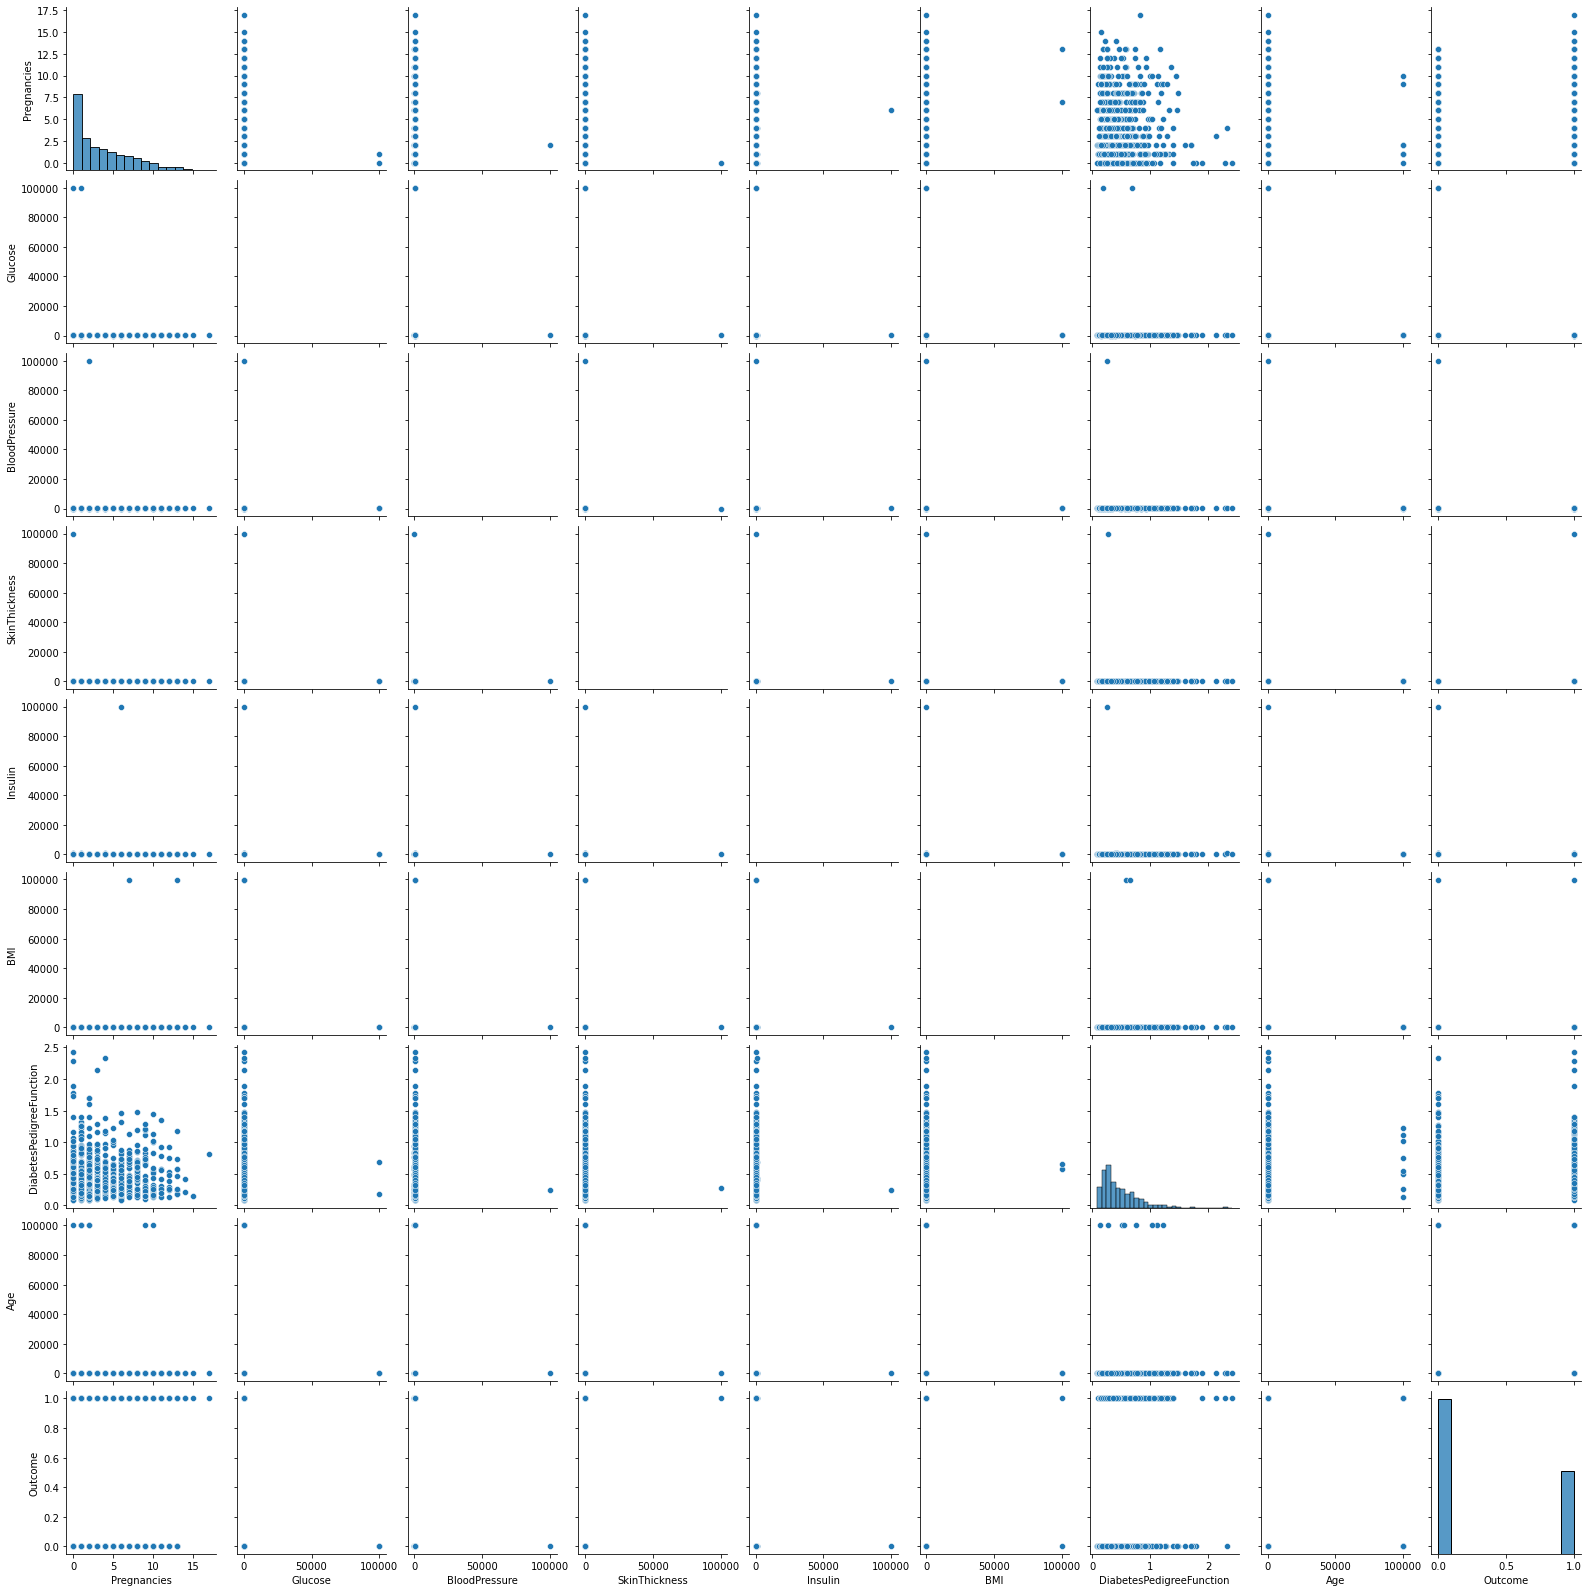

In [48]:
sns.pairplot(df)

In [51]:
## 앞선 두 단계에서 얻은 향후 분석시 고려사항
## (1) Glucos / BloodPressure / BMI / Age 는 0이 나올 수 없는 것 -> 해당 인덱스 삭제 
## -> 이상치를 결측치처리해서 drop시키는걸로  
## (2) Glucos / BloodPressure / BMI 는 정규분포와 유사한 형태이지만, 
##  Pregnancies / SkinThickness / DiabetesPedigreeFunction / Age 는 우하향하는 형태를 보임
## (3) 각 컬럼별 단위가 다르므로 scaling 필요

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 767 entries, 0 to 766
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               767 non-null    float64
 1   Glucose                   765 non-null    float64
 2   BloodPressure             766 non-null    float64
 3   SkinThickness             766 non-null    float64
 4   Insulin                   766 non-null    float64
 5   BMI                       765 non-null    float64
 6   DiabetesPedigreeFunction  767 non-null    float64
 7   Age                       759 non-null    float64
 8   Outcome                   767 non-null    float64
dtypes: float64(9)
memory usage: 54.1 KB

각 컬럼별 이상치 갯수


Pregnancies                 0
Glucose                     2
BloodPressure               1
SkinThickness               1
Insulin                     1
BMI                         2
DiabetesPedigreeFunction    0
Age                         8
Outcome                     0
dtype: int64

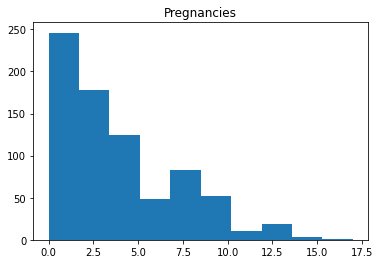

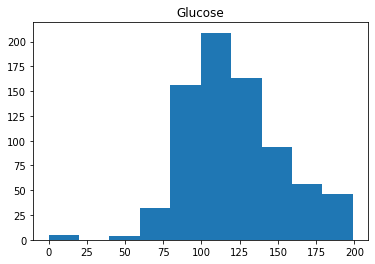

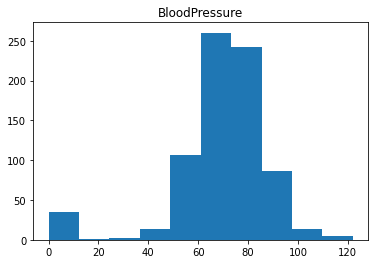

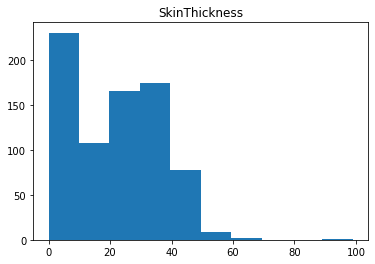

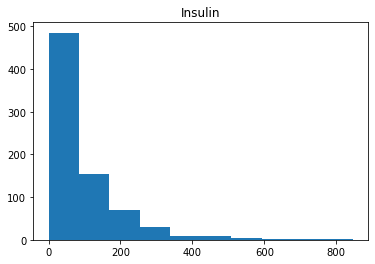

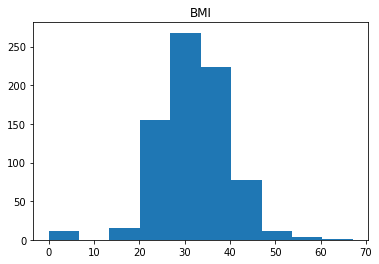

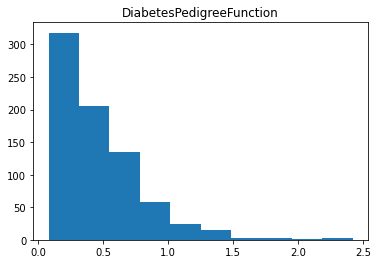

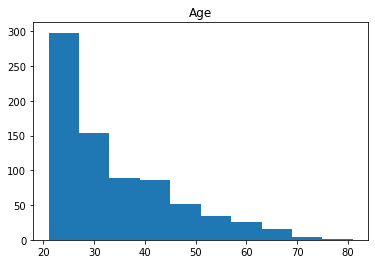

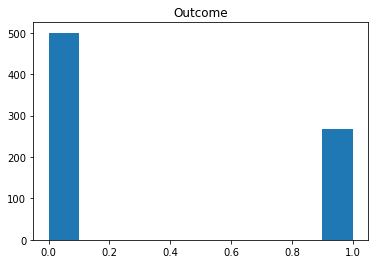

In [60]:
# 99999를 결측치로 처리해서 drop시킨 히스토그램 출력
drop_df = pd.read_csv('data/adp22-p1.csv', na_values=[99999])
column_name = ['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age','Outcome']
df = pd.DataFrame(drop_df.values.tolist(), columns=column_name)

df.info()
print('\n각 컬럼별 이상치 갯수')
display(df.isnull().sum())

# 
for v in df.select_dtypes(include='float'):
    target = df[v].dropna()
    plt.hist(target)
    plt.title(v)
    plt.show()

In [49]:
## 클래스 불균형 처리 
## 업 샘플링 과정 설명 및 결과 

In [56]:
df.Outcome.value_counts()

0.0    500
1.0    267
Name: Outcome, dtype: int64

In [74]:
df.Outcome.value_counts().iloc[0] / df.Outcome.value_counts().iloc[-1]

1.8726591760299625

In [75]:
ddf = df.dropna(axis=0)
ddf.Outcome.value_counts()

0.0    491
1.0    261
Name: Outcome, dtype: int64

In [76]:
ddf.Outcome.value_counts().iloc[0] / ddf.Outcome.value_counts().iloc[-1]

1.8812260536398469

In [61]:
# 결측치로 처리한 이상치를 삭제해도 샘플수 및 Outcome 비율의 큰 변화가 없다고 판단

In [102]:
# 데이터 분할
# 데이터 분할 전에 scaling하면 np.array 로 되어 번거로워지므로 
# 오버/언더 샘플링 선정까지 완료된 후 모델 적용단계에서 scaling
from sklearn.model_selection import train_test_split

X = ddf.drop(columns=['Outcome'])
y = ddf['Outcome']

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=999, test_size=0.35)

In [103]:
# kNN을 사용한 클래스 불균형 테스트 
# -> 재현율 45%로 불균형을 보완할 필요가 있다고 판단됨
# https://blog.naver.com/gh03014/222310201860

from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.metrics import *

kNN_model = KNN(n_neighbors = 11).fit(X_train, y_train)
pred_y = kNN_model.predict(X_test)

print(recall_score(y_test, pred_y))
print(accuracy_score(y_test, pred_y))

0.45652173913043476
0.7234848484848485


In [108]:
# train / test set 중에서 train set에 대해서만 오버/언더샘플링 진행
# 오버샘플링 과정 및 결과
from imblearn.over_sampling import SMOTE

X_imb = X_train.reset_index(drop=True).copy()
y_imb = y_train.reset_index(drop=True).copy()

SMOTE_X_samp, SMOTE_y_samp = SMOTE(random_state=999).fit_resample(X_imb, y_imb)
SMOTE_total = pd.concat([SMOTE_X_samp, SMOTE_y_samp], axis=1)

SMOTE_total.info()
SMOTE_total.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 638 entries, 0 to 637
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               638 non-null    float64
 1   Glucose                   638 non-null    float64
 2   BloodPressure             638 non-null    float64
 3   SkinThickness             638 non-null    float64
 4   Insulin                   638 non-null    float64
 5   BMI                       638 non-null    float64
 6   DiabetesPedigreeFunction  638 non-null    float64
 7   Age                       638 non-null    float64
 8   Outcome                   638 non-null    float64
dtypes: float64(9)
memory usage: 45.0 KB


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,638.000000,638.000000,638.000000,638.000000,638.000000,638.000000,638.000000,638.000000,638.000000
mean,4.144088,126.122944,69.107730,20.880246,89.320441,32.661140,0.487912,34.373479,0.500000
std,3.447013,32.045691,19.979212,16.269753,123.097172,7.556359,0.327947,11.510967,0.500392
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,103.226949,64.000000,0.000000,0.000000,28.559540,0.254076,24.891655,0.000000
50%,3.022105,122.000000,72.000000,25.000000,37.500000,32.866302,0.408430,31.000000,0.500000
75%,7.000000,147.000000,80.000000,32.515182,140.000000,36.800000,0.663196,42.000000,1.000000
max,17.000000,198.000000,110.000000,99.000000,600.000000,67.100000,2.420000,81.000000,1.000000


In [109]:
# 언더샘플링 과정 및 결과 
# https://mingtory.tistory.com/46
from imblearn.under_sampling import NearMiss
NM_model = NearMiss(version=3, n_neighbors_ver3=3)  

NM_X_samp, NM_y_samp = NM_model.fit_resample(X_imb, y_imb)
NM_total = pd.concat([NM_X_samp, NM_y_samp], axis=1)

NM_total.info()
NM_total.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 332 entries, 0 to 331
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               332 non-null    float64
 1   Glucose                   332 non-null    float64
 2   BloodPressure             332 non-null    float64
 3   SkinThickness             332 non-null    float64
 4   Insulin                   332 non-null    float64
 5   BMI                       332 non-null    float64
 6   DiabetesPedigreeFunction  332 non-null    float64
 7   Age                       332 non-null    float64
 8   Outcome                   332 non-null    float64
dtypes: float64(9)
memory usage: 23.5 KB


C:\ProgramData\Anaconda3\lib\site-packages\imblearn\under_sampling\_prototype_selection\_nearmiss.py:188: UserWarning: The number of the samples to be selected is larger than the number of samples available. The balancing ratio cannot be ensure and all samples will be returned.
  warnings.warn(


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,332.000000,332.000000,332.000000,332.000000,332.000000,332.000000,332.000000,332.000000,332.000000
mean,4.448795,131.153614,70.584337,21.840361,91.135542,33.601506,0.495753,35.521084,0.509036
std,3.616900,30.246079,20.439627,17.428363,122.351864,7.399769,0.349107,11.675219,0.500673
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.088000,21.000000,0.000000
25%,1.000000,111.000000,66.000000,0.000000,0.000000,29.575000,0.246750,25.750000,0.000000
50%,4.000000,128.000000,74.000000,27.000000,0.000000,33.450000,0.407500,32.000000,1.000000
75%,7.000000,150.000000,82.000000,35.000000,152.750000,37.725000,0.683000,43.000000,1.000000
max,17.000000,198.000000,110.000000,99.000000,600.000000,67.100000,2.420000,69.000000,1.000000


In [120]:
## 둘중의 선택 -> 오버샘플링
## 이유 : 예측 정확도를 높이기 위해서는 많은 데이터 확보가 효과적이므로
# - 언더샘플링은 다수클래스의 표본을 임의로 제거 (NearMiss)
# - 오버샘플링은 소수클래스의 표본을 임의로 복제 (SMOTE, ADASYN 등)
## 각 샘플링의 장단점
# - 언더샘플링은 중요한 데이터가 소실되거나 모집단의 분포를 왜곡시킬 우려
# - SMOTE는 다수 클래스를 샘플링하고 기존 소수 인스턴스를 보간하여 작동하므로 
#   기존 데이터의 소수 클래스 특성만을 반영하고 새로운 사례의 예측에는 취약할수 있음
# https://mkjjo.github.io/python/2019/01/04/smote_duplicate.html

In [121]:
## 모델링 - 최소 3개이상 알고리즘 제시하고 정확도 측면 모델1개, 속도 측면 모델1개 구현 
# => 분류를 위한 알고리즘에는 로지스틱 회귀, 랜덤포레스트, SVM, 의사결정나무 등이 있음
# => 속도 측면에서 로지스틱 회귀, 정확도 측면에서 랜덤포레스트 선택
# 의사결정나무는 시간 오래 걸려서 제외
# SVM은 커널방식과 마진에 따라 성능차이가 크게 나타나므로 제외 https://liveyourit.tistory.com/62

In [122]:
import time
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import MinMaxScaler

In [123]:
result_auc_train = []
result_auc_test = []
result_time = []

for train_X, train_y in [(SMOTE_X_samp, SMOTE_y_samp)]:
    
    trainX = train_X.copy()
    testX = X_test.copy()
    sc = MinMaxScaler()
    trainX = sc.fit_transform(trainX)
    testX = sc.transform(testX)
    
    
    lrstart = time.time()
    lr = LogisticRegression()
    lr.fit(trainX, train_y)
    lrend = time.time() - lrstart
    
    pred_lr = lr.predict(testX)
    auc_lr_train = roc_auc_score(train_y, lr.predict(trainX))
    auc_lr = roc_auc_score(y_test, pred_lr)
    
    rfstart = time.time()
    rf = RandomForestClassifier()
    rf.fit(trainX, train_y)
    rfend = time.time() - rfstart
    
    pred_rf = rf.predict(testX)
    auc_rf_train = roc_auc_score(train_y, rf.predict(trainX))
    auc_rf = roc_auc_score(y_test, pred_rf)
    
    result_auc_test.append([auc_lr, auc_rf])
    result_time.append([lrend, rfend])
    result_auc_train.append([auc_lr_train, auc_rf_train])

In [158]:
# lr과 rf 분류의 정확도 및 모델학습시간

print('train set - 모델별 auc 결과')
result_auc_train_SMOTE = pd.DataFrame(result_auc_train)
result_auc_train_SMOTE.index = ['SMOTE']
result_auc_train_SMOTE.columns = ['logistic','randomforest']
display(result_auc_train_SMOTE)

print('test set - 모델별 auc 결과')
result_auc_test_SMOTE = pd.DataFrame(result_auc_test)
result_auc_test_SMOTE.index = ['SMOTE']
result_auc_test_SMOTE.columns = ['logistic','randomforest']
display(result_auc_tests)

print('모델별 학습시간 (sec)')
result_times_SMOTE = pd.DataFrame(result_time)
result_times_SMOTE.index = ['SMOTE']
result_times_SMOTE.columns = ['logistic','randomforest']
result_times_SMOTE


train set - 모델별 auc 결과


,logistic,randomforest
SMOTE,0.722571,1.0


test set - 모델별 auc 결과


,logistic,randomforest
SMOTE,0.608443,0.645096


모델별 학습시간 (sec)


,logistic,randomforest
SMOTE,0.005956,0.165555


In [125]:
## 결과 설명
## - lr의 경우, 학습시간은 rf에 비해 짧았지만 (속도 측면에서 lr이 rf보다 유리)
##   학습시의 정확도는 rf에 비해 낮게 나옴 
## - rf의 경우, train set 학습에서 과적합되었고 (auc 값이 1로 나옴)
##   test set에 대해서는 lr보다 auc값이 높게 나옴

In [131]:
## 속도 개선을 위한 차원축소 설명 및 수행, 예측성능과 속도를 비교하고 결과 작성
## - 오버샘플링한 SMOTE_total 데이터프레임으로 scaling + 차원축소(PCA) 수행 

from sklearn.decomposition import PCA

pca_X = SMOTE_X_samp.copy()
sc = MinMaxScaler()
pca_X = sc.fit_transform(pca_X)
    
pca = PCA() 
pc_score = pca.fit_transform(pca_X)

In [132]:
pca.explained_variance_  # PC값들의 설명정도 확인

array([0.0661218 , 0.06136956, 0.03045983, 0.02346009, 0.01885202,
       0.01607821, 0.01363607, 0.00851527])

In [138]:
pc_ratio = pca.explained_variance_ratio_ # PC값들의 설명력 비율 확인
pc_ratio

array([0.27724857, 0.25732244, 0.127718  , 0.09836813, 0.07904646,
       0.0674159 , 0.05717601, 0.03570449])

,V_ratio
PC1,0.277249
PC2,0.257322
PC3,0.127718
PC4,0.098368
PC5,0.079046
PC6,0.067416
PC7,0.057176
PC8,0.035704


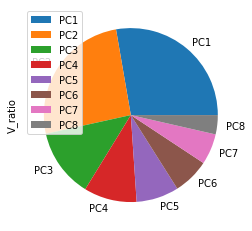

In [142]:
df_v = pd.DataFrame(pc_ratio, index=['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8',], columns=['V_ratio'])
df_v.plot.pie(y='V_ratio')
df_v
# 주성분1이 27.7%, 주성분2가 25.7%, 주성분3이 12.77%, 주성분4가 9.84%의 설명력을 가지는 것으로 나타남
# 설명력이 주성분3 이후로 크게 감소하고, 
# 4개 주성분으로 76%를 설명하고 있으므로 
# 주성분 갯수를 4개차원으로 축소하여 모델링하는 것이 적합하다고 판단

In [152]:
# 주성분 4개로 지정하여 PCA 수행 및 주성분으로 이루어진 데이터 프레임 구성

# train set
pca = PCA(n_components=4) 

pc_score = pca.fit_transform(pca_X)

pca_df = pd.DataFrame(data=pc_score, columns = ['PC1','PC2','PC3','PC4'])
pca_df.head()


,PC1,PC2,PC3,PC4
0,0.561394,0.516492,0.370093,-0.032967
1,0.031087,0.332640,-0.201060,-0.013875
2,-0.059183,0.453219,0.124092,-0.052044
3,0.312159,-0.241475,-0.030289,0.169756
4,-0.069000,-0.086232,-0.131601,0.181608


In [161]:
# test set 
from sklearn.decomposition import PCA

pca_X_test = X_test.copy()
sc = MinMaxScaler()
pca_X_test = sc.fit_transform(pca_X_test) # scaling

pc_score_test = pca.fit_transform(pca_X_test)

pca_df_test = pd.DataFrame(data=pc_score_test, columns = ['PC1','PC2','PC3','PC4'])
pca_df_test.head()


,PC1,PC2,PC3,PC4
0,-0.065693,-0.402903,-0.154598,0.148539
1,-0.479950,0.270028,-0.126239,-0.018241
2,-0.369210,-0.061637,0.287157,-0.133923
3,0.004771,0.487001,-0.155761,0.109932
4,-0.027844,-0.083411,0.289296,0.034149


In [162]:
result_auc_train_pca = []
result_auc_test_pca = []
result_time_pca = []

for train_X, train_y in [(pca_df, SMOTE_y_samp)]:
    
    trainX = train_X.copy()
    testX = pca_df_test.copy()
    
    
    lrstart = time.time()
    lr = LogisticRegression()
    lr.fit(trainX, train_y)
    lrend = time.time() - lrstart
    
    pred_lr = lr.predict(testX)
    auc_lr_train = roc_auc_score(train_y, lr.predict(trainX))
    auc_lr = roc_auc_score(y_test, pred_lr)
    
    rfstart = time.time()
    rf = RandomForestClassifier()
    rf.fit(trainX, train_y)
    rfend = time.time() - rfstart
    
    pred_rf = rf.predict(testX)
    auc_rf_train = roc_auc_score(train_y, rf.predict(trainX))
    auc_rf = roc_auc_score(y_test, pred_rf)
    
    result_auc_test_pca.append([auc_lr, auc_rf])
    result_time_pca.append([lrend, rfend])
    result_auc_train_pca.append([auc_lr_train, auc_rf_train])

In [170]:
# lr과 rf 분류의 정확도 및 모델학습시간

print('train set - 모델별 auc 결과')
result_auc_train_pca = pd.DataFrame(result_auc_train_pca)
result_auc_train_pca.columns = ['logistic','randomforest']
result_auc_trains = pd.concat([result_auc_train_SMOTE, result_auc_train_pca], axis=0)
result_auc_trains.index = ['SMOTE', 'PCA']
display(result_auc_trains)

print('test set - 모델별 auc 결과')
result_auc_test_pca = pd.DataFrame(result_auc_test_pca)
result_auc_test_pca.columns = ['logistic','randomforest']
result_auc_tests = pd.concat([result_auc_test_SMOTE, result_auc_test_pca], axis=0)
result_auc_tests.index = ['SMOTE', 'PCA']

display(result_auc_tests)

print('모델별 학습시간 (sec)')
result_time_pca = pd.DataFrame(result_time_pca)
result_time_pca.columns = ['logistic','randomforest']
result_times = pd.concat([result_times_SMOTE, result_time_pca], axis=0)
result_times.index = ['SMOTE', 'PCA']
result_times

train set - 모델별 auc 결과


,logistic,randomforest
SMOTE,0.722571,1.0
PCA,0.722571,1.0


test set - 모델별 auc 결과


,logistic,randomforest
SMOTE,0.608443,0.645096
PCA,0.608443,0.611350


모델별 학습시간 (sec)


,logistic,randomforest
SMOTE,0.005956,0.165555
PCA,0.006981,0.165556


In [164]:
## 결과 설명
## - 속도개선을 위해 차원축소(PCA)를 수행하였으나, rf는 학습시간의 차이가 거의 없었고 lr은 오히려 PCA가 오래 걸림
## - 학습시의 정확도 측면에서는 test set에 대해서는 차원축소하지 않은 경우(SMOTE)보다 
##   차원축소(PCA)한 경우의 정확도가 떨어지는 것으로 나타남 (근소하게 auc가 낮게 나타남)